In [23]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 
print('Tensorflow version ',tf.__version__)

Tensorflow version  2.1.0


Importing MNIST Datasets

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

Shapes of imported Arrays

In [3]:
print('x_train shape : ',x_train.shape)
print('y_train shape : ',y_train.shape)
print('x_test shape : ',x_test.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
x_test shape :  (10000, 28, 28)
y_test shape :  (10000,)


Plot an image

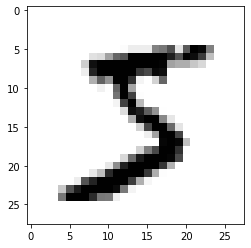

In [4]:
%matplotlib inline
plt.imshow(x_train[0],cmap='binary')
plt.show()

Display labels

In [5]:
y_train[0]

5

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Encoding labels

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_oh=to_categorical(y_train)

y_test_oh = to_categorical(y_test)

print('y_train_oh shape : ',y_train_oh.shape)
print('y_test_oh shape : ',y_test_oh.shape)

y_train_oh shape :  (60000, 10)
y_test_oh shape :  (10000, 10)


Display encoded label

In [8]:
 y_train_oh[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Reshaping N-dimentional arrays to vectors

In [9]:
x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

print('x_train_reshaped shape : ',x_train_reshaped.shape)
print('x_test_reshaped shape : ',x_test_reshaped.shape)

x_train_reshaped shape :  (60000, 784)
x_test_reshaped shape :  (10000, 784)


Data Normalization

In [10]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilion = 1e-10

x_train_norm = x_train_reshaped/255
x_test_norm = x_test_reshaped/255
print(set(x_train_norm[0]))

{0.0, 0.49411764705882355, 0.6862745098039216, 1.0, 0.4980392156862745, 0.9921568627450981, 0.06274509803921569, 0.5098039215686274, 0.611764705882353, 0.6274509803921569, 0.00392156862745098, 0.15294117647058825, 0.21568627450980393, 0.07058823529411765, 0.25098039215686274, 0.19215686274509805, 0.00784313725490196, 0.3137254901960784, 0.3058823529411765, 0.011764705882352941, 0.3686274509803922, 0.1411764705882353, 0.13725490196078433, 0.25882352941176473, 0.3215686274509804, 0.4470588235294118, 0.5215686274509804, 0.5294117647058824, 0.6705882352941176, 0.6745098039215687, 0.7333333333333333, 0.7176470588235294, 0.7450980392156863, 0.788235294117647, 0.8588235294117647, 0.8352941176470589, 0.09019607843137255, 0.8862745098039215, 0.8980392156862745, 0.9490196078431372, 0.9333333333333333, 0.9411764705882353, 0.9764705882352941, 0.984313725490196, 0.5333333333333333, 0.6509803921568628, 0.9686274509803922, 0.6666666666666666, 0.5450980392156862, 0.6039215686274509, 0.4666666666666667

Creating Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def Create_model():
    model = Sequential([
        Dense(128,activation='relu',input_shape=(784,)),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['acc']
    )
    return model
    

In [12]:
model=Create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


create folders to save, load and export model

In [13]:
import os
folders = ['tmp','models','model_name','weights']
for folder in folders:
    if not os.path.isdir(folder):
        os.mkdir(folder)

print(os.listdir('.'))


['.git', '.ipynb_checkpoints', 'models', 'model_name', 'tmp', 'Untitled.ipynb', 'Untitled1.ipynb', 'weights']


train the model

In [19]:

model_dir = 'models/'

model.fit(
    x_train_norm,y_train_oh,
    validation_data=(x_test_norm,y_test_oh),
    epochs=5,
    batch_size=512,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            os.path.join(model_dir,'epoch_{epoch:02d}_acc{val_acc:.4f}.h5'),
            monitor='val_acc',save_weights_only=False,
            save_best_only=True
        
        )
    ]

)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0764 - acc: 0.9780 - val_loss: 0.0941 - val_acc: 0.9705
Epoch 2/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0642 - acc: 0.9809 - val_loss: 0.0894 - val_acc: 0.9723
Epoch 3/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0537 - acc: 0.9838 - val_loss: 0.0828 - val_acc: 0.9736
Epoch 4/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0469 - acc: 0.9865 - val_loss: 0.0835 - val_acc: 0.9739
Epoch 5/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0403 - acc: 0.9885 - val_loss: 0.0792 - val_acc: 0.9766


check the saved files

In [20]:
os.listdir(model_dir)

['.ipynb_checkpoints',
 'epoch_01_acc0.9705.h5',
 'epoch_02_acc0.9723.h5',
 'epoch_03_acc0.9736.h5',
 'epoch_04_acc0.9739.h5',
 'epoch_05_acc0.9766.h5']

Make prediction

In [21]:
preds = model.predict(x_test_norm)
print('shape of pred : ',preds.shape)

shape of pred :  (10000, 10)


plotting some result

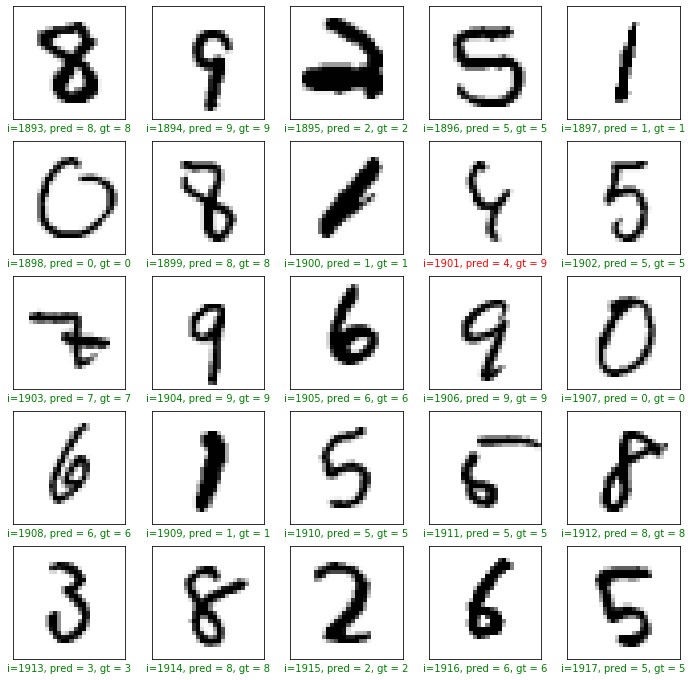

In [22]:
plt.figure(figsize=(12,12))


start = 0
moves = 1893
for i in range(0,25,1):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start+i+moves])
    gt = y_test[start+i+moves]
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred = {}, gt = {}'.format(start+moves+i, pred, gt), color = col)
    plt.imshow(x_test[start+i+moves],cmap='binary')
plt.show()
    

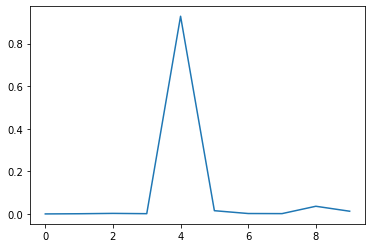

In [18]:
plt.plot(preds[1901])
plt.show()

In [24]:
model.save('model_name')
os.listdir('model_name/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_name\assets


['assets', 'saved_model.pb', 'variables']